<a href="https://colab.research.google.com/github/samuelpsouza/distributed-computing/blob/main/lab05/lab05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Importing Dada MNIST

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Ploting data

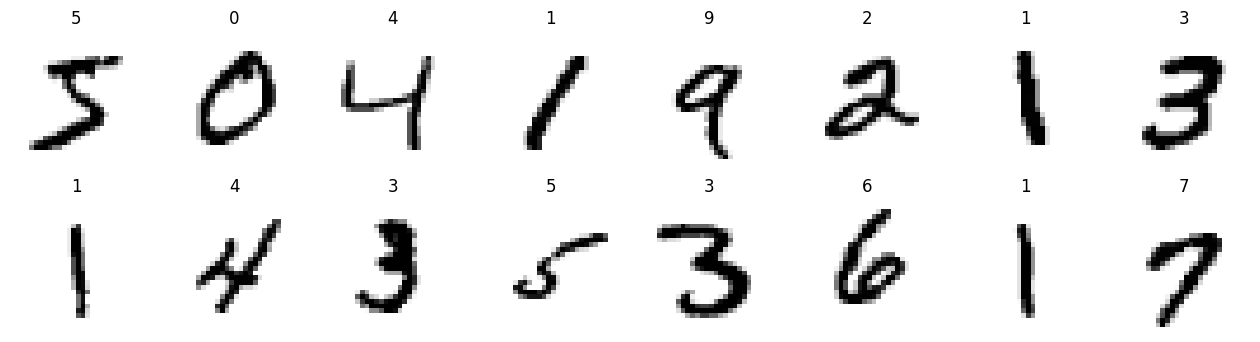

In [4]:
rows    = 2
columns = 8

fig, axs = plt.subplots(rows, columns, figsize=(16, 4))
axs      = axs.flatten()

for i in range(rows * columns):
  axs[i].imshow(x_train[i], cmap='gray_r')
  axs[i].set_title(str(y_train[i]))
  axs[i].axis('off')

plt.show()

### Normalizing the Data

In [5]:
x_train, x_test = x_train / 255.0, x_test / 255.0

### Defining the Model

In [6]:
model_1 = tf.keras.models.Sequential()
model_1.add(tf.keras.layers.Flatten(input_shape=(28, 28, 1)))
model_1.add(tf.keras.layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compiling the Model

In [7]:
model_1.compile(
    optimizer='sgd',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

### Training the Model

In [8]:
history_model_1 = model_1.fit(
    x_train,
    y_train,
    epochs=10,
    validation_data=(x_test, y_test),
    batch_size=64
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6589 - loss: 1.3466 - val_accuracy: 0.8599 - val_loss: 0.6056
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8556 - loss: 0.5935 - val_accuracy: 0.8818 - val_loss: 0.4807
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8746 - loss: 0.4873 - val_accuracy: 0.8887 - val_loss: 0.4293
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8816 - loss: 0.4463 - val_accuracy: 0.8944 - val_loss: 0.4004
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8876 - loss: 0.4197 - val_accuracy: 0.8974 - val_loss: 0.3818
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8924 - loss: 0.4010 - val_accuracy: 0.9004 - val_loss: 0.3679
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.8963 - loss: 0.3843 - val_accuracy: 0.9034 - val_loss: 0.3568
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8987 - loss: 0.3739 - val_accuracy: 0.9055 - va

### Ploting Results

In [9]:
def plot_model_results(history):
  fig, ax = plt.subplots(1, 2, figsize=(10, 3))
  ax      = ax.flatten()

  ax[0].plot(history.history['accuracy'], label='Training Accuracy', marker='o', color='blue')
  ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o', color='red', linestyle='--')

  ax[1].plot(history.history['loss'], label='Training Loss', marker='o', color='blue')
  ax[1].plot(history.history['val_loss'], label='Validation Loss', marker='o', color='red', linestyle='--')

  for _ in range(2):
    ax[_].set_xlabel('Epoch')
    ax[_].set_ylabel('Accuracy' if _ == 0 else 'Loss')
    ax[_].legend()
    ax[_].grid(True, linestyle=':')

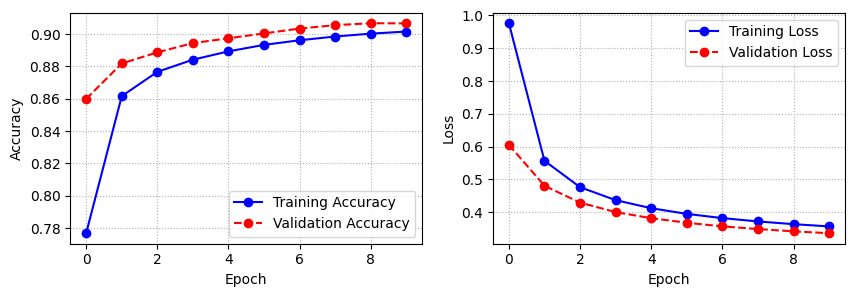

In [10]:
plot_model_results(history_model_1)

### Add more layers

In [11]:
model_2 = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
        tf.keras.layers.Dense(200, activation='sigmoid'),
        tf.keras.layers.Dense(60, activation='sigmoid'),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)

In [12]:
model_2.compile(
    optimizer='sgd',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [13]:
history_model_2 = model_2.fit(
    x_train,
    y_train,
    epochs=10,
    validation_data=(x_test, y_test),
    batch_size=64,
    verbose=2
)

Epoch 1/10
938/938 - 6s - 6ms/step - accuracy: 0.2827 - loss: 2.2468 - val_accuracy: 0.5400 - val_loss: 2.1733
Epoch 2/10
938/938 - 7s - 8ms/step - accuracy: 0.5688 - loss: 2.0717 - val_accuracy: 0.6336 - val_loss: 1.9321
Epoch 3/10
938/938 - 5s - 5ms/step - accuracy: 0.6513 - loss: 1.7565 - val_accuracy: 0.6946 - val_loss: 1.5503
Epoch 4/10
938/938 - 7s - 7ms/step - accuracy: 0.7132 - loss: 1.3854 - val_accuracy: 0.7480 - val_loss: 1.2117
Epoch 5/10
938/938 - 8s - 9ms/step - accuracy: 0.7625 - loss: 1.0968 - val_accuracy: 0.7874 - val_loss: 0.9695
Epoch 6/10
938/938 - 7s - 7ms/step - accuracy: 0.7980 - loss: 0.8963 - val_accuracy: 0.8173 - val_loss: 0.8062
Epoch 7/10
938/938 - 11s - 11ms/step - accuracy: 0.8244 - loss: 0.7615 - val_accuracy: 0.8394 - val_loss: 0.6956
Epoch 8/10
938/938 - 9s - 9ms/step - accuracy: 0.8410 - loss: 0.6692 - val_accuracy: 0.8536 - val_loss: 0.6188
Epoch 9/10
938/938 - 10s - 10ms/step - accuracy: 0.8535 - loss: 0.6031 - val_accuracy: 0.8651 - val_loss: 0.56

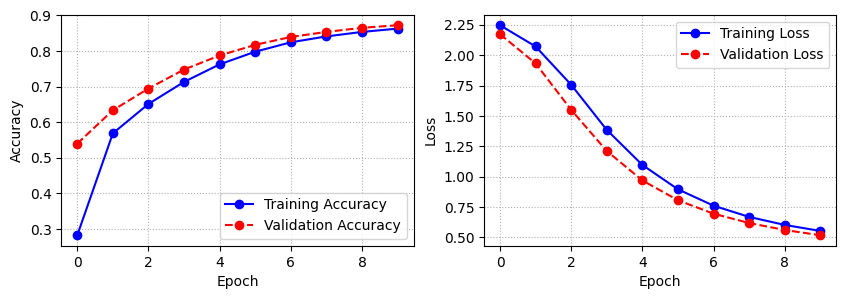

In [14]:
plot_model_results(history_model_2)

### Activation ReLu

In [15]:
model_3 = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dense(60, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)

In [16]:
model_3.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [17]:
history_model_3 = model_3.fit(
    x_train,
    y_train,
    epochs=10,
    validation_data=(x_test, y_test),
    batch_size=64,
    verbose=2
)

Epoch 1/10
938/938 - 10s - 10ms/step - accuracy: 0.9247 - loss: 0.2587 - val_accuracy: 0.9621 - val_loss: 0.1246
Epoch 2/10
938/938 - 9s - 10ms/step - accuracy: 0.9693 - loss: 0.1037 - val_accuracy: 0.9699 - val_loss: 0.0963
Epoch 3/10
938/938 - 8s - 8ms/step - accuracy: 0.9779 - loss: 0.0710 - val_accuracy: 0.9720 - val_loss: 0.0861
Epoch 4/10
938/938 - 8s - 9ms/step - accuracy: 0.9834 - loss: 0.0519 - val_accuracy: 0.9760 - val_loss: 0.0797
Epoch 5/10
938/938 - 6s - 6ms/step - accuracy: 0.9876 - loss: 0.0392 - val_accuracy: 0.9716 - val_loss: 0.0901
Epoch 6/10
938/938 - 8s - 9ms/step - accuracy: 0.9899 - loss: 0.0308 - val_accuracy: 0.9770 - val_loss: 0.0776
Epoch 7/10
938/938 - 10s - 11ms/step - accuracy: 0.9916 - loss: 0.0262 - val_accuracy: 0.9769 - val_loss: 0.0846
Epoch 8/10
938/938 - 7s - 8ms/step - accuracy: 0.9938 - loss: 0.0197 - val_accuracy: 0.9783 - val_loss: 0.0775
Epoch 9/10
938/938 - 8s - 9ms/step - accuracy: 0.9933 - loss: 0.0199 - val_accuracy: 0.9769 - val_loss: 0.0

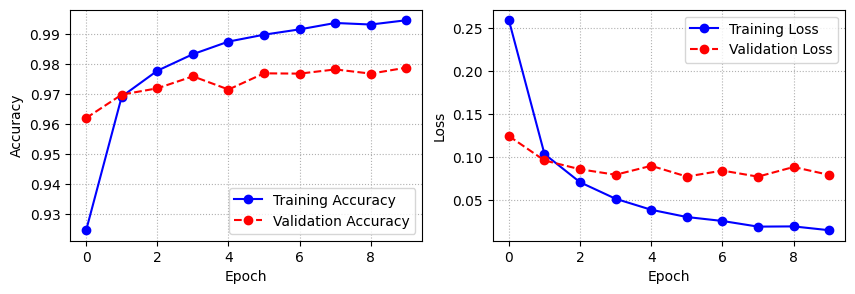

In [18]:
plot_model_results(history_model_3)

## CNN

In [19]:
import math

model_4 = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(kernel_size=3, filters=12, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(kernel_size=6, filters=24, activation='relu', padding='same', strides=2),
        tf.keras.layers.Conv2D(kernel_size=6, filters=32, activation='relu', padding='same', strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)

In [20]:
# lr decay function

def lr_decay(epoch):
  return 0.01 * math.pow(0.666, epoch)

lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lr_decay, verbose=True)

In [21]:
model_4.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history_model_4 = model_4.fit(
    x_train,
    y_train,
    epochs=10,
    validation_data=(x_test, y_test),
    callbacks=[lr_decay_callback],
    batch_size=64,
    verbose=2
)


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/10
938/938 - 79s - 84ms/step - accuracy: 0.9533 - loss: 0.1568 - val_accuracy: 0.9777 - val_loss: 0.0795 - learning_rate: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.00666.
Epoch 2/10
938/938 - 103s - 110ms/step - accuracy: 0.9833 - loss: 0.0564 - val_accuracy: 0.9860 - val_loss: 0.0455 - learning_rate: 0.0067

Epoch 3: LearningRateScheduler setting learning rate to 0.004435560000000001.
Epoch 3/10
938/938 - 122s - 130ms/step - accuracy: 0.9901 - loss: 0.0325 - val_accuracy: 0.9809 - val_loss: 0.0580 - learning_rate: 0.0044

Epoch 4: LearningRateScheduler setting learning rate to 0.0029540829600000007.
Epoch 4/10
938/938 - 74s - 79ms/step - accuracy: 0.9944 - loss: 0.0176 - val_accuracy: 0.9889 - val_loss: 0.0409 - learning_rate: 0.0030

Epoch 5: LearningRateScheduler setting learning rate to 0.0019674192513600007.
Epoch 5/10
938/938 - 72s - 77ms/step - accuracy: 0.9973 - loss: 0.0079 - val_acc

In [ ]:
plot_model_results(history_model_4)

### Using Dropout

In [ ]:
model_5 = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(kernel_size=3, filters=12, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(kernel_size=6, filters=24, activation='relu', padding='same', strides=2),
        tf.keras.layers.Conv2D(kernel_size=6, filters=32, activation='relu', padding='same', strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)

In [ ]:
model_5.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history_model_5 = model_5.fit(
    x_train,
    y_train,
    epochs=10,
    validation_data=(x_test, y_test),
    callbacks=[lr_decay_callback],
    batch_size=64,
    verbose=2
)

In [ ]:
plot_model_results(history_model_5)